# <font color='blue'> Análisis Estadístico de Parámetros de Estado Estable

Por lo general, los estudios de simulación se realizan para determinar el valor de cierta cantidad $\theta$ relacionada con el modelo estocástico particular. Una simulación del sistema en cuestión produce los datos de salida $X$, una variable aleatoria cuyo valor esperado es la cantidad de interés $\theta$, y se realiza durante $n$ ejecuciones.

El promedio de estos $n$ valores,

<font color='red'>$$\bar{X} = \sum_{i=1}^n \frac{X_i}{n}$$

sirve como estimador, o aproximador de $\theta$. Este promedio aritmético es la **media muestral**.

Para determinar la "bondad" de $\bar{X}$ como estimador de la media poblacional $\theta$, consideramos el error cuadrático medio:

$$\mathbb{E}[(\bar{X}-\theta)^2]=\mathbb{Var}(\bar{X})=\frac{\sigma^2}{n}$$

donde $\mathbb{E}[\bar{X}]=\theta$ y $\mathbb{Var}(X_i)=\sigma^2$

Entonces, $\bar{X}$ es un buen estimador de $\theta$ cuando $\frac{\sigma}{\sqrt{n}}$ es pequeño.

La dificultad de este indicador de bondad es que por lo general no se conoce la varianza poblacional $\sigma^2$, así que también debe estimarse.

Para ello se usa la varianza muestral, $S^2$:

<font color='red'>$$S^2=\frac{\sum_{i=1}^n (X_i-\bar{X})^2}{n-1}$$

$S^2$ es la **varianza poblacional** y $s=\sqrt{S^2}$ es la **desviación estándar muestral**.

De modo que la estimación del error cuadrático medio es:

$$ECM = \frac{S^2}{n}$$

De modo que la estimación del error estándar es:

<font color='red'>$$e=\frac{S}{\sqrt{n}}$$

### <font color='blue'> Ejercicio

Estimemos el valor de la integral $\int_0^1 \sqrt( \arctan x ) dx$.

Modificar el ejercicio ya realizado para obtener una estimación de la integral y una medida de su bondad.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos la función de prueba.
def funcion(x):
    return np.sqrt(np.arctan(x))

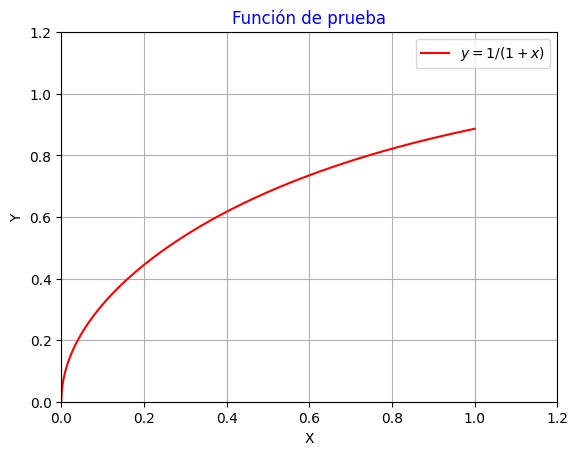

In [3]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
#plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
def integ(func=funcion, n=10000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.62805
El error estándar es: 0.00205


In [5]:
integ(n=100)

(0.6398732758701364, 0.019603546508794804)

### Método para determinar cuando detenerse al generar nuevos datos

1. Elegir un valor aceptable $d$ para la desviación estándar del estimador.

2. Generar al menos 30 datos.

3. Continuar generando más datos, hasta detenerse cuando se hayan generado $k$ valores y $\frac{S}{\sqrt{k}}<d$, donde $S$ es la desviación estándar muestral basada en estos $k$ valores.

4. La estimación de $\theta$ está dada por $\bar{X}=\sum_{i=1}^k \frac{X-i}{k}$.

# <font color='blue'> Intervalos de Confianza

El intervalo de confianza a $((1-\alpha) \times 100)$ % para una población de media $\mu$ está dado por la fórmula:

$$\bar{x} \pm t \times \frac{s}{\sqrt{n}},$$

donde:

$t$ es una variable aleatoria que tiene una distribución t de Student con $(n-1)$ grados de libertad.

$\bar{x}$ es la media muestral

$s$ es la desviación estándar muestral

$n$ es el tamaño de la muestra

$\alpha$ es el nivel de significancia

$(1 - \alpha)$ es el nivel de confianza

In [6]:
import statistics as stat
import math

In [7]:
muestra = [3.2, 3, 2.8, 2.9, 3.1]

In [8]:
n=len(muestra)             # cantidad de datos
mean=stat.mean(muestra)    # media muestral
s=stat.stdev(muestra)      # desviacion estandar muestral

t=2.776                    # para un nivel de confianza al 95%

# usamos las formulas
ic1 = mean - t*(s/math.sqrt(n))
ic2 = mean + t*(s/math.sqrt(n))

print("Intervalo de confianza:", round(ic1, 2), round(ic2, 2))

Intervalo de confianza: 2.8 3.2


### Ejercicio:

1. Hacer una función que devuelva el intervalo de confianza.

2. Calcular los intervalos de confianza a 80, 90, 95, 98 y 99% con la muestra:

  $\{3.33, \; 3.15,\; 2.91,\; 3.05,\; 2.75 \}$

In [13]:
import math
from scipy.stats import norm

def calcular_intervalo_confianza(muestra, confianza):
    n = len(muestra)  # Tamaño de la muestra
    p = sum(muestra) / n  # Proporción de éxitos en la muestra

    # Cálculo del intervalo de confianza utilizando la distribución normal
    z = norm.ppf(1 - (1 - confianza) / 2)
    prop_error = max(p * (1 - p), 1e-8)  # Valor mínimo para evitar números negativos en la raíz cuadrada
    error = z * math.sqrt(prop_error / n)
    intervalo_inferior = p - error
    intervalo_superior = p + error

    return intervalo_inferior, intervalo_superior

In [14]:
muestra = [3.33, 3.15, 2.91, 3.05, 2.75]
niveles_confianza = [0.8, 0.9, 0.95, 0.98, 0.99]

for confianza in niveles_confianza:
    intervalo = calcular_intervalo_confianza(muestra, confianza)
    print("Intervalo de confianza al", confianza*100, "%:", intervalo)

Intervalo de confianza al 80.0 %: (3.0379426872716557, 3.038057312728345)
Intervalo de confianza al 90.0 %: (3.0379264399095423, 3.0380735600904583)
Intervalo de confianza al 95.0 %: (3.0379123477459427, 3.038087652254058)
Intervalo de confianza al 98.0 %: (3.037895962560287, 3.0381040374397137)
Intervalo de confianza al 99.0 %: (3.037884805411577, 3.0381151945884235)
